**Bootstrapping the Speed of Light Data:**

We'll re-analyze Michelson's data for the speed of light in air using a resampling method called the Monte Carlo Bootstrap. The bootstrap can be a robust estimate of bias and uncertainty when computing the geometric mean and using Law of Large Numbers is unable to find the most likely value and accurately assign uncertainty to the most likely value. This can happen a lot, particularly if there is a systematic *bias* in the data.

Michelson's speed of light measurements earned him a Nobel Prize in Physics. He made them between a source and detector (telescope) that were both on mountains, 35 km apart. A rotating mirror produced a pulse effect, and by tuning the speed on the rotating mirror so that the light beam is coincident with two faces on an octagonal mirror, he could measure the speed of light.

We're going to use his data to illustrate some methods of data analysis.

![Diagram of Michelson's experiment. Taken from sciencetopia.net](Apparatus.jpg)

If you're missing a package in your registry, you can add it here. You can also compartmentalize all the "using" functions here.

In [39]:
using Pkg
Pkg.add("Plots")
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("Downloads")

using CSV, DataFrames, Downloads, Plots, HypothesisTests

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
  [f43a241f] + Downloads v1.6.0
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


In [40]:
# Download Michelson's speed of light data from a reliable source
url = "https://risk-engineering.org/static/data/michelson-speed-light.csv"
data = Downloads.download(url)
michelson = CSV.read(data, DataFrame)

# The data represents speed of light measurements, showing deviations from 299,000 km/s
# Create histogram of speed values

names(michelson)

speeds = michelson[:, "velocity of light in air (km/s)"]

mean = x->sum(x)/length(x) #λ function to calculate mean

if mean(speeds) ≈ 299852.4
    println("**TEST**: Speeds of light read in successfully.")
end

typeof(speeds)

**TEST**: Speeds of light read in successfully.


Vector{Int64} (alias for Array{Int64, 1})

Make a histogram of the speed of light data.

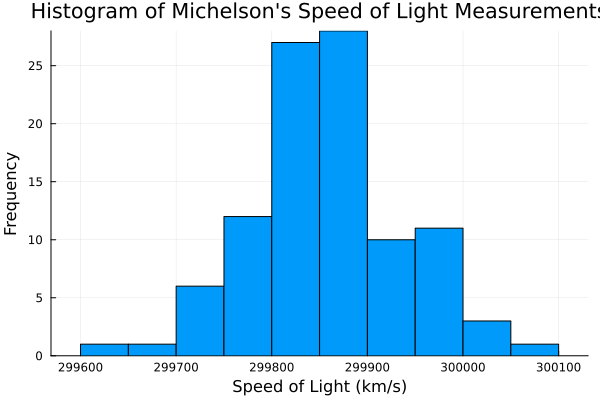

In [2]:
histogram(speeds, 
    xlabel="Speed of Light (km/s)", 
    ylabel="Frequency",
    title="Histogram of Michelson's Speed of Light Measurements",
    bins=20,
    legend=false)

The histogram looks asymmetric, so it's not clear that the standard formulae for finding the most probable value of c and assigning uncertainty work here. What we will do instead is construct synthetic data sets using the **bootstrap Monte Carlo method**. 

The bootstrap consists of the following steps:

* 1. Construct $N$ synthetic data sets by *resampling* the original data *with replacement*.
* 2. Compute the mean of each synthetic data set.
* 3. Analyze the distribution of the means computed from the synthetic data.

Let's code it up.

In [15]:
function synthetic(x::Vector{Int64})
    n = length(x)
    s = zeros(n)
    for i = 1:n
        ipick = rand(1:n)
        s[i] = x[ipick]
    end
    return s
end

# Write a test.

synthetic (generic function with 1 method)

In [23]:
function speed_dist(x::Vector{Int64},samples::Int64)
    n = length(x)
    cbar = zeros(samples)
    for i = 1:samples
        s = synthetic(x)
        cbar[i] = mean(s)
    end
    return cbar
end

speed_dist (generic function with 3 methods)

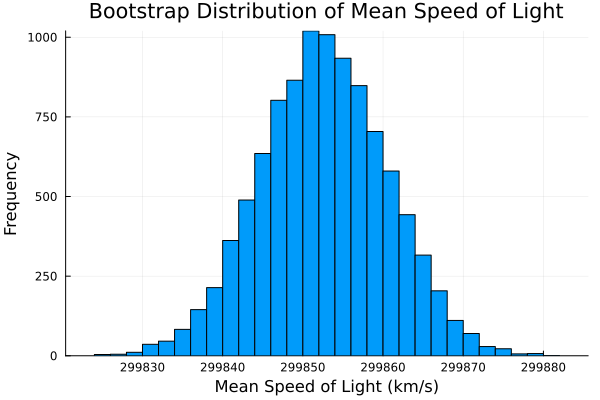

In [24]:
cbar = speed_dist(speeds,10000);

histogram(cbar, 
    xlabel="Mean Speed of Light (km/s)", 
    ylabel="Frequency",
    title="Bootstrap Distribution of Mean Speed of Light",
    bins=40,
    legend=false)

This simple test checks the bias. If the data is biased, the mean of the data will differ from the mean of the bootstrapped samples.

A more sophisticated analysis would use the t-test, but that's enough fun for today.

In [27]:
@show mean(cbar)

@show mean(speeds)

mean(cbar) = 299852.55487
mean(speeds) = 299852.4


299852.4